In [4]:
from __future__ import print_function
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib as plt
import os
import json

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
os.getenv('PUIDATA')

'/home/cusp/amy324/PUIdata'

In [27]:
url = 'http://www.armazemdedados.rio.rj.gov.br/arquivos/879_rendimento%20mensal%20m%C3%A9dio%20oriundo%20do%20trabalho.XLS'

In [113]:
data = pd.read_excel(url, header=3)

In [114]:
data.head(5)

,Regiões Administrativas,Masculino,Feminino
0,NaN,NaN,NaN
1,Rio de Janeiro,589.355990,252.592167
2,NaN,NaN,NaN
3,I Portuária,289.797861,129.347992
4,II Centro,557.897652,319.294736


In [115]:
# Cleaning data - excluding row 0 and 2 
data.drop([0, 2], axis=0, inplace=True)

In [116]:
data.head(5)

,Regiões Administrativas,Masculino,Feminino
1,Rio de Janeiro,589.355990,252.592167
3,I Portuária,289.797861,129.347992
4,II Centro,557.897652,319.294736
5,III Rio Comprido,431.134579,220.902467
6,IV Botafogo,1402.717898,657.835131


In [117]:
# Renaming columns names to english
data.columns = ["Districts", 'Male (R$)', 'Female (R$)']
data.head()

,Districts,Male (R$),Female (R$)
1,Rio de Janeiro,589.355990,252.592167
3,I Portuária,289.797861,129.347992
4,II Centro,557.897652,319.294736
5,III Rio Comprido,431.134579,220.902467
6,IV Botafogo,1402.717898,657.835131


In [118]:
# the first column "Rio de Janeiro" is a median of all data, let's make a new data frame just with regions
df_rg = data[1::]

In [119]:
df_rg.head(5)

,Districts,Male (R$),Female (R$)
3,I Portuária,289.797861,129.347992
4,II Centro,557.897652,319.294736
5,III Rio Comprido,431.134579,220.902467
6,IV Botafogo,1402.717898,657.835131
7,V Copacabana,1295.173081,549.100659


In [120]:
df_rg.keys()

Index([u'Districts', u'Male (R$)', u'Female (R$)'], dtype='object')

In [121]:
df_rg = df_rg.dropna()

In [259]:
df_rg['Ratio'] = df_rg['Male (R$)']/df_rg['Female (R$)']
df_rg.head()

,Districts,Male (R$),Female (R$),Ratio
3,I Portuária,289.797861,129.347992,2.240451
4,II Centro,557.897652,319.294736,1.747281
5,III Rio Comprido,431.134579,220.902467,1.951697
6,IV Botafogo,1402.717898,657.835131,2.132324
7,V Copacabana,1295.173081,549.100659,2.358717


In [260]:
top10 = df_rg.sort(['Ratio'], ascending=0)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [261]:
top10 = result[:10]

In [236]:
top10

,Districts,Male (R$),Female (R$),Ratio
26,XXIV Barra da Tijuca,1992.022554,661.810064,3.009961
21,XIX Santa Cruz,229.825869,82.791312,2.775966
28,XXVI Guaratiba,256.150862,94.821735,2.701394
33,XXXIII Realengo,363.611334,137.110633,2.651956
8,VI Lagoa,2191.016040,826.566181,2.650745
24,XXII Anchieta,318.557413,120.763743,2.637856
20,XVIII Campo Grande,327.288669,126.305953,2.591237
16,XIV Irajá,466.700120,184.016517,2.536186
22,XX Ilha do Governador,634.448232,252.452774,2.513136
27,XXV Pavuna,266.518262,106.098961,2.511978


In [282]:
# Rounding Ratios to plot
for n in np.array((top10.index)):
    top10['Ratio'][n] = round(top10['Ratio'][n], 2)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [283]:
top10

,Districts,Male (R$),Female (R$),Ratio
26,XXIV Barra da Tijuca,1992.022554,661.810064,3.01
21,XIX Santa Cruz,229.825869,82.791312,2.78
28,XXVI Guaratiba,256.150862,94.821735,2.70
33,XXXIII Realengo,363.611334,137.110633,2.65
8,VI Lagoa,2191.016040,826.566181,2.65
24,XXII Anchieta,318.557413,120.763743,2.64
20,XVIII Campo Grande,327.288669,126.305953,2.59
16,XIV Irajá,466.700120,184.016517,2.54
22,XX Ilha do Governador,634.448232,252.452774,2.51
27,XXV Pavuna,266.518262,106.098961,2.51


In [237]:
# For labeling purposes, I create a new dataframe to store Districts names
t10_dist = pd.DataFrame(top10.Districts.str.split(' ',1).tolist(),
                                   columns = ['Districts','New Districts'])

In [239]:
t10_dist.head(5)

,Districts,New Districts
0,XXIV,Barra da Tijuca
1,XIX,Santa Cruz
2,XXVI,Guaratiba
3,XXXIII,Realengo
4,VI,Lagoa


### Now we have our data cleaned, let's make a plot to see the difference between Males and Females median salaries in Rio De Janeiro, by district

In [284]:
male = np.array(top10['Male (R$)'])
female = np.array(top10['Female (R$)'])
districts = np.array(t10_dist['New Districts'])
ratio = np.array(top10['Ratio'])
male

array([ 1992.02255399,   229.82586913,   256.15086249,   363.61133397,
        2191.01604013,   318.5574126 ,   327.28866917,   466.70011982,
         634.44823165,   266.51826191])

In [ ]:
import matplotlib.cm as cm

In [285]:
x_1 = np.array([0, 2500])
y_1 = x_1

In [329]:
pl.annotate?

(0, 850)

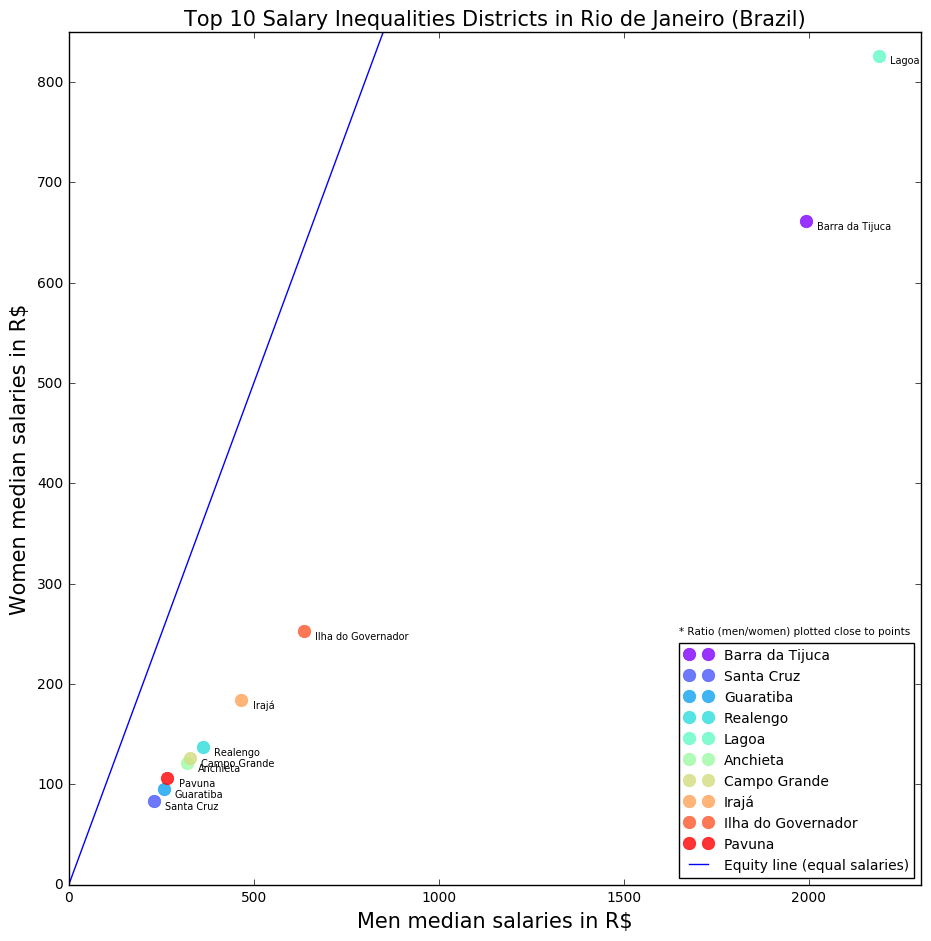

In [367]:
pl.figure(figsize=(11,11))
colors = iter(cm.rainbow(np.linspace(0, 1, len(top10))))

for i in range(0, len(top10)):
    pl.plot(male[i], female[i], '.', ms = '18', alpha = 0.8, label=districts[i], color=next(colors))

pl.plot(x_1, y_1, label = 'Equity line (equal salaries)')
   
# Plotting labels
for label, x, y in zip(labels, male, female):
    pl.annotate(
        label, 
        xy = (x, y), xytext = (8, 0),
        textcoords = 'offset points', ha = 'left', va = 'top',
        fontsize=7
        )

pl.legend(loc='lower right', shadow=False, fontsize=10)

pl.title('Top 10 Salary Inequalities Districts in Rio de Janeiro (Brazil)', fontsize=15)
pl.annotate('* Ratio (men/women) plotted close to points', xy=(1650, 250), fontsize=7.5)  
pl.xlabel("Men median salaries in R$", fontsize = 15)
pl.ylabel("Women median salaries in R$", fontsize = 15)

pl.xlim(0, 2305)
pl.ylim(0, 850)

In [ ]:
labels

In [89]:
df_rg

,Districts,Male (R$),Female (R$)
3,I Portuária,289.797861,129.347992
4,II Centro,557.897652,319.294736
5,III Rio Comprido,431.134579,220.902467
6,IV Botafogo,1402.717898,657.835131
7,V Copacabana,1295.173081,549.100659
8,VI Lagoa,2191.016040,826.566181
9,VII São Cristovão,344.992528,164.943569
10,VIII Tijuca,1124.104232,465.155243
11,IX Vila Isabel,982.322054,440.203265
12,X Ramos,423.228318,187.387518
